In [39]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.12.0


In [2]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:

df = pd.DataFrame(columns=['name','time','LA(x)', 'LA(y)', 'LA(z)'])

filepath = os.path.join(os.getcwd(), 'straightWalk\\farah.csv')
test = pd.read_csv(filepath)
name='farah'
df[['time','LA(x)', 'LA(y)', 'LA(z)']] = test[['TimeStamp','LA(x)', 'LA(y)', 'LA(z)']].copy()
df['name'] = df['name'].fillna(name)
df = df.dropna()
num_rows_before = df.shape[0]
    
twenty_percent = num_rows_before * 0.20
twenty_percent = math.ceil(twenty_percent)
df = df.iloc[:-twenty_percent]
df

,name,time,LA(x),LA(y),LA(z)
1,farah,3,0.000396,-0.018154,-0.012510
4,farah,8,-0.012109,-0.026237,0.031507
7,farah,12,-0.016179,-0.008139,0.014645
10,farah,17,-0.001156,-0.013927,0.033567
14,farah,22,-0.009967,-0.014923,0.025115
...,...,...,...,...,...
13325,farah,21943,2.808808,-2.140078,-5.238740
13328,farah,21948,2.247876,-2.144404,-4.538074
13331,farah,21953,2.051339,-2.264786,-3.535931
13334,farah,21958,2.328768,-2.231296,-2.514104


In [4]:
df = pd.DataFrame(columns=['name','time','LA(x)', 'LA(y)', 'LA(z)'])
directory = os.path.join(os.getcwd(), 'straightWalk')
x=1
firstTime = True
for filename in os.listdir(directory):
    if (filename.endswith(".csv")):
        filepath = os.path.join(directory, filename)
        testOriginal = pd.read_csv(filepath)
        test=testOriginal[['TimeStamp','LA(x)', 'LA(y)', 'LA(z)']].copy()
        test = test.rename(columns={'TimeStamp': 'time'})
        
#         num_rows_before = test.shape[0]
    
#         twenty_percent = num_rows_before * 0.2
#         twenty_percent = math.ceil(twenty_percent)
#         test = test.iloc[:-twenty_percent]

        df = pd.concat([df, test])
        name=filename[:-4]
        df['name'] = df['name'].fillna(name)
        df = df.dropna()
        print(df)

            name   time     LA(x)     LA(y)     LA(z)
1      alibadawy      4 -0.268265 -0.005538 -0.071094
4      alibadawy      7 -0.163861 -0.004340  0.122527
6      alibadawy     11 -0.058163 -0.010288  0.070122
9      alibadawy     14  0.020515 -0.012621  0.048953
13     alibadawy     21  0.106720 -0.009007  0.210836
...          ...    ...       ...       ...       ...
14671  alibadawy  24157 -0.082257 -0.020919  0.681743
14674  alibadawy  24162 -0.351623 -0.095208  0.286807
14676  alibadawy  24166 -0.591241 -0.224824  0.019406
14680  alibadawy  24172 -0.706387 -0.284920 -0.179078
14683  alibadawy  24178 -0.734943 -0.285185 -0.303724

[4895 rows x 5 columns]
              name   time     LA(x)     LA(y)     LA(z)
1        alibadawy      4 -0.268265 -0.005538 -0.071094
4        alibadawy      7 -0.163861 -0.004340  0.122527
6        alibadawy     11 -0.058163 -0.010288  0.070122
9        alibadawy     14  0.020515 -0.012621  0.048953
13       alibadawy     21  0.106720 -0.009007  

            name   time     LA(x)     LA(y)     LA(z)
1      alibadawy      4 -0.268265 -0.005538 -0.071094
4      alibadawy      7 -0.163861 -0.004340  0.122527
6      alibadawy     11 -0.058163 -0.010288  0.070122
9      alibadawy     14  0.020515 -0.012621  0.048953
13     alibadawy     21  0.106720 -0.009007  0.210836
...          ...    ...       ...       ...       ...
14707       mira  24216  0.480411  0.359961 -1.444484
14711       mira  24223  0.293639  0.284895 -1.726781
14713       mira  24227  0.108653  0.222336 -1.862949
14717       mira  24232 -0.057824  0.154710 -1.895112
14720       mira  24238 -0.162172  0.070391 -1.778990

[71700 rows x 5 columns]
            name   time     LA(x)     LA(y)     LA(z)
1      alibadawy      4 -0.268265 -0.005538 -0.071094
4      alibadawy      7 -0.163861 -0.004340  0.122527
6      alibadawy     11 -0.058163 -0.010288  0.070122
9      alibadawy     14  0.020515 -0.012621  0.048953
13     alibadawy     21  0.106720 -0.009007  0.210836
..

            name   time     LA(x)     LA(y)     LA(z)
1      alibadawy      4 -0.268265 -0.005538 -0.071094
4      alibadawy      7 -0.163861 -0.004340  0.122527
6      alibadawy     11 -0.058163 -0.010288  0.070122
9      alibadawy     14  0.020515 -0.012621  0.048953
13     alibadawy     21  0.106720 -0.009007  0.210836
...          ...    ...       ...       ...       ...
14825     yaseen  24421 -0.176889  0.790535  0.063382
14828     yaseen  24426 -0.171780  0.862543  0.072266
14831     yaseen  24433 -0.271340  0.813723  0.008819
14834     yaseen  24436 -0.412237  0.766684 -0.144485
14837     yaseen  24441 -0.526550  0.793556 -0.247305

[137186 rows x 5 columns]
            name   time     LA(x)     LA(y)     LA(z)
1      alibadawy      4 -0.268265 -0.005538 -0.071094
4      alibadawy      7 -0.163861 -0.004340  0.122527
6      alibadawy     11 -0.058163 -0.010288  0.070122
9      alibadawy     14  0.020515 -0.012621  0.048953
13     alibadawy     21  0.106720 -0.009007  0.210836
.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157197 entries, 1 to 16029
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    157197 non-null  object 
 1   time    157197 non-null  object 
 2   LA(x)   157197 non-null  float64
 3   LA(y)   157197 non-null  float64
 4   LA(z)   157197 non-null  float64
dtypes: float64(3), object(2)
memory usage: 7.2+ MB


In [6]:
df.isnull().sum()

name     0
time     0
LA(x)    0
LA(y)    0
LA(z)    0
dtype: int64

In [7]:
df['name'].value_counts()

karen              6435
mayar              5988
habibatarabay      5905
yusuf              5713
hananabil          5627
waed               5601
farah              5558
moustafa           5482
rolla              5475
mohameddawoud      5454
zoz                5344
ola                5235
mohamedelshoura    5194
ghazaly            5155
nourhan            5131
seifana            5035
yaseen             4946
mira               4907
alibadawy          4895
hussenhany         4858
hashem             4854
youssefemad        4653
seifzakaria        4646
janah              4601
ismail             4577
moataz             4522
tokhye             4477
youssef            4301
salwa              4288
heidi              4175
dinaelgendy        4165
Name: name, dtype: int64

In [8]:
Fs = 200
activities = df['name'].value_counts().index
activities = activities[:3]
activities

Index(['karen', 'mayar', 'habibatarabay'], dtype='object')

In [9]:
data = df.copy()
data = data.rename(columns={'LA(x)': 'x'})
data = data.rename(columns={'LA(y)': 'y'})
data = data.rename(columns={'LA(z)': 'z'})
data

,name,time,x,y,z
1,alibadawy,4,-0.268265,-0.005538,-0.071094
4,alibadawy,7,-0.163861,-0.004340,0.122527
6,alibadawy,11,-0.058163,-0.010288,0.070122
9,alibadawy,14,0.020515,-0.012621,0.048953
13,alibadawy,21,0.106720,-0.009007,0.210836
...,...,...,...,...,...
16018,zoz,26376,0.032646,0.028275,0.519662
16021,zoz,26381,-0.478584,-0.296353,0.069982
16024,zoz,26386,-0.897290,-0.563466,-0.287334
16027,zoz,26390,-1.035197,-0.655348,-0.474507


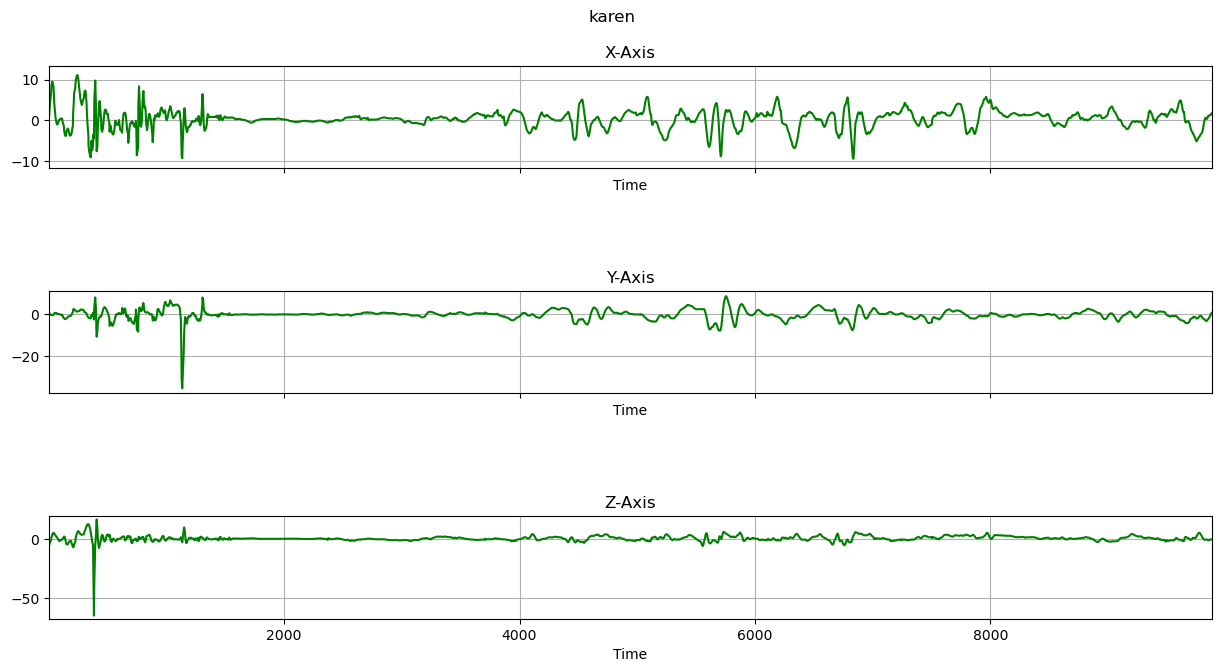

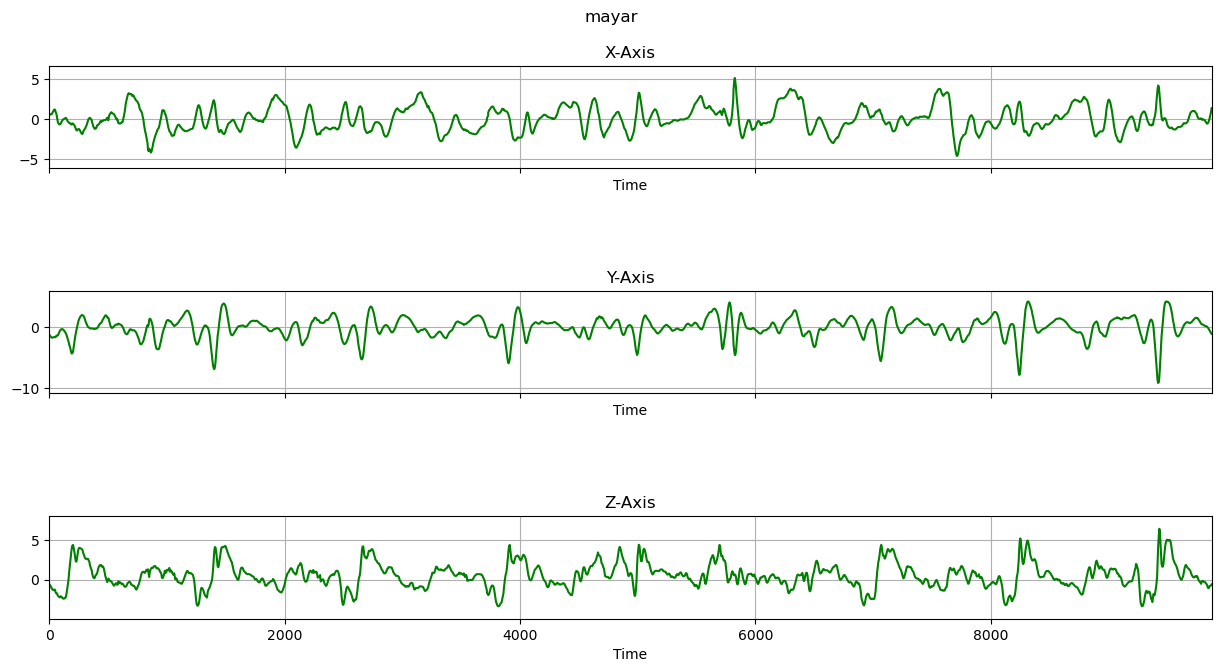

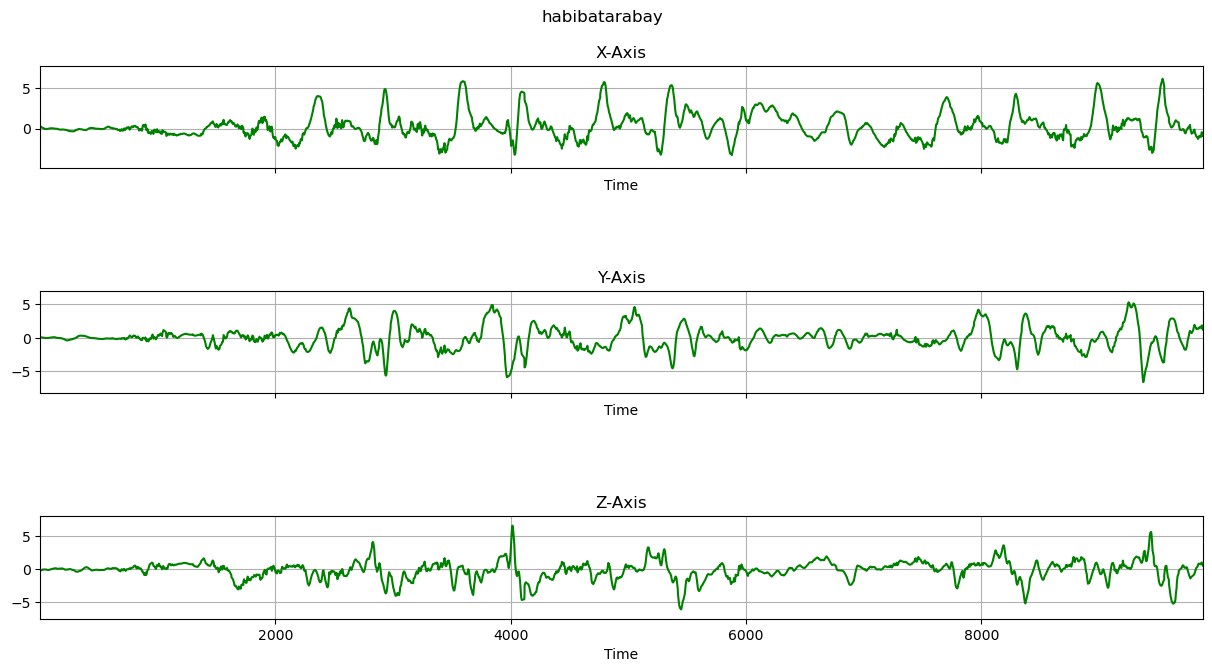

In [10]:

def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=1.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(True)  # Make the x-axis visible
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    ax.set_xlabel('Time')  # Set the x-label for each individual axis




for activity in activities:
    data_for_plot = data[(data['name'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [11]:
df = data.drop(['time'], axis = 1).copy()

In [12]:
df

,name,x,y,z
1,alibadawy,-0.268265,-0.005538,-0.071094
4,alibadawy,-0.163861,-0.004340,0.122527
6,alibadawy,-0.058163,-0.010288,0.070122
9,alibadawy,0.020515,-0.012621,0.048953
13,alibadawy,0.106720,-0.009007,0.210836
...,...,...,...,...
16018,zoz,0.032646,0.028275,0.519662
16021,zoz,-0.478584,-0.296353,0.069982
16024,zoz,-0.897290,-0.563466,-0.287334
16027,zoz,-1.035197,-0.655348,-0.474507


In [13]:
df['name'].value_counts()

karen              6435
mayar              5988
habibatarabay      5905
yusuf              5713
hananabil          5627
waed               5601
farah              5558
moustafa           5482
rolla              5475
mohameddawoud      5454
zoz                5344
ola                5235
mohamedelshoura    5194
ghazaly            5155
nourhan            5131
seifana            5035
yaseen             4946
mira               4907
alibadawy          4895
hussenhany         4858
hashem             4854
youssefemad        4653
seifzakaria        4646
janah              4601
ismail             4577
moataz             4522
tokhye             4477
youssef            4301
salwa              4288
heidi              4175
dinaelgendy        4165
Name: name, dtype: int64

In [14]:
balanced_data = df.copy()

In [15]:
balanced_data.shape

(157197, 4)

In [16]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['name'])
balanced_data

,name,x,y,z,label
1,alibadawy,-0.268265,-0.005538,-0.071094,0
4,alibadawy,-0.163861,-0.004340,0.122527,0
6,alibadawy,-0.058163,-0.010288,0.070122,0
9,alibadawy,0.020515,-0.012621,0.048953,0
13,alibadawy,0.106720,-0.009007,0.210836,0
...,...,...,...,...,...
16018,zoz,0.032646,0.028275,0.519662,30
16021,zoz,-0.478584,-0.296353,0.069982,30
16024,zoz,-0.897290,-0.563466,-0.287334,30
16027,zoz,-1.035197,-0.655348,-0.474507,30


In [17]:
label.classes_

array(['alibadawy', 'dinaelgendy', 'farah', 'ghazaly', 'habibatarabay',
       'hananabil', 'hashem', 'heidi', 'hussenhany', 'ismail', 'janah',
       'karen', 'mayar', 'mira', 'moataz', 'mohameddawoud',
       'mohamedelshoura', 'moustafa', 'nourhan', 'ola', 'rolla', 'salwa',
       'seifana', 'seifzakaria', 'tokhye', 'waed', 'yaseen', 'youssef',
       'youssefemad', 'yusuf', 'zoz'], dtype=object)

In [18]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,-0.157740,0.115899,-0.107901,0
1,-0.120316,0.116358,-0.047245,0
2,-0.082428,0.114082,-0.063662,0
3,-0.054225,0.113189,-0.070293,0
4,-0.023324,0.114572,-0.019580,0
...,...,...,...,...
157192,-0.049876,0.128840,0.077168,30
157193,-0.233131,0.004606,-0.063706,30
157194,-0.383219,-0.097617,-0.175644,30
157195,-0.432652,-0.132780,-0.234280,30


In [20]:
import scipy.stats as stats

Fs = 200
frame_size = Fs*4 # 800
hop_size = Fs*2 # 600 //overlapping

In [21]:
df = scaled_X.copy()

In [22]:
def get_frames(df, frame_size, hop_size):
    N_FEATURES = 3

    frames = []
    labels = []
    
    last_value = df['label'].iloc[-1]
    for j in range (0,last_value+1): 
        filtered_df = df[df['label'] == j]
        
        for i in range(0, len(filtered_df) - frame_size, hop_size):
            x = filtered_df['x'].values[i: i + frame_size]
            y = filtered_df['y'].values[i: i + frame_size]
            z = filtered_df['z'].values[i: i + frame_size]

            label = j

            frames.append([x, y, z])
            labels.append(label)

    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)
    
    return frames, labels
X, y = get_frames(scaled_X,frame_size, hop_size)
X.shape, y.shape
        

((347, 800, 3), (347,))

In [23]:
X

array([[[-1.57740090e-01, -1.20315824e-01, -8.24276713e-02],
        [-5.42246851e-02, -2.33239918e-02, -4.03794445e-04],
        [ 2.01498551e-02,  4.00082661e-02,  4.98623891e-02],
        ...,
        [-7.88970769e-01, -7.27686399e-01, -6.70118912e-01],
        [-5.69987087e-01, -4.29582000e-01, -2.63507136e-01],
        [-1.07278851e-01,  1.91208208e-02,  1.57100855e-01]],

       [[-1.38273429e+00, -1.33931848e+00, -1.27272673e+00],
        [-1.17487492e+00, -1.05268658e+00, -8.94725146e-01],
        [-7.01586361e-01, -4.84675299e-01, -2.10987627e-01],
        ...,
        [ 5.81420830e-01,  6.08508909e-01,  6.05556386e-01],
        [ 5.82012857e-01,  5.39567063e-01,  4.80999132e-01],
        [ 4.08051719e-01,  3.24274012e-01,  2.35137954e-01]],

       [[-4.82655069e-01, -7.58798077e-01, -1.05983028e+00],
        [-1.33450641e+00, -1.53113563e+00, -1.63557632e+00],
        [-1.62287761e+00, -1.55670271e+00, -1.47021811e+00],
        ...,
        [ 9.37966754e-02, -9.17218309e-02,

In [24]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [26]:
X_train.shape, X_test.shape

((277, 800, 3), (70, 800, 3))

In [27]:
# Get the unique elements and their counts
unique_elements, counts = np.unique(y_test, return_counts=True)

# Print the unique elements and their counts
for element, count in zip(unique_elements, counts):
    print(f"Number {element} is repeated {count} times")

Number 0 is repeated 2 times
Number 1 is repeated 2 times
Number 2 is repeated 3 times
Number 3 is repeated 2 times
Number 4 is repeated 3 times
Number 5 is repeated 3 times
Number 6 is repeated 2 times
Number 7 is repeated 2 times
Number 8 is repeated 2 times
Number 9 is repeated 2 times
Number 10 is repeated 2 times
Number 11 is repeated 3 times
Number 12 is repeated 3 times
Number 13 is repeated 2 times
Number 14 is repeated 2 times
Number 15 is repeated 3 times
Number 16 is repeated 2 times
Number 17 is repeated 2 times
Number 18 is repeated 2 times
Number 19 is repeated 2 times
Number 20 is repeated 2 times
Number 21 is repeated 2 times
Number 22 is repeated 2 times
Number 23 is repeated 2 times
Number 24 is repeated 2 times
Number 25 is repeated 3 times
Number 26 is repeated 2 times
Number 27 is repeated 2 times
Number 28 is repeated 2 times
Number 29 is repeated 3 times
Number 30 is repeated 2 times


In [28]:
y_test

array([29, 23, 25, 14,  1, 19, 15,  5,  4,  6, 24,  0,  4, 10, 16, 30, 13,
        8, 27, 20, 26, 29, 17, 12, 14, 10, 12, 27,  2, 18, 16,  7, 17, 21,
       22, 11, 18,  1, 21,  3, 25,  5,  4, 11,  5, 29,  2,  0, 23, 20, 25,
        6,  9, 15, 28, 28, 11,  3, 22, 19, 15,  7, 13, 26,  9, 24, 30, 12,
        2,  8])

In [29]:
X_train.shape, X_test.shape

((277, 800, 3), (70, 800, 3))

In [30]:
train_shape_0 = X_train.shape[0]
test_shape_0 = X_test.shape[0]
train_shape_1 = X_train.shape[1]
test_shape_1 = X_test.shape[1]
train_shape_1

800

In [31]:
X_train.shape

(277, 800, 3)

In [32]:
X_train[0].shape

(800, 3)

In [33]:
X_train = X_train.reshape(train_shape_0, train_shape_1, 3, 1)
X_test = X_test.reshape(test_shape_0, test_shape_1, 3, 1)

In [34]:
X_train[0].shape, X_test[0].shape

((800, 3, 1), (800, 3, 1))

## Finished Processing Data

## CNN Model

In [42]:
X_train[0].shape

(800, 3, 1)

In [55]:
model = Sequential()
model.add(Conv2D(50, (2,2), activation = 'relu', input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2,1)))
model.add(Dropout(0.1))

model.add(Conv2D(100, (2,2), activation = 'relu', input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2,1)))

model.add(Flatten())

model.add(Dense(31, activation='softmax'))

In [57]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
9/9 [==============================] - 1s 91ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 11.6016 - val_accuracy: 0.2143
Epoch 2/10
9/9 [==============================] - 1s 73ms/step - loss: 0.0090 - accuracy: 0.9964 - val_loss: 11.2794 - val_accuracy: 0.2143
Epoch 3/10
9/9 [==============================] - 1s 76ms/step - loss: 0.0159 - accuracy: 0.9928 - val_loss: 12.2235 - val_accuracy: 0.2143
Epoch 4/10
9/9 [==============================] - 1s 73ms/step - loss: 0.1151 - accuracy: 0.9783 - val_loss: 10.7307 - val_accuracy: 0.2143
Epoch 5/10
9/9 [==============================] - 1s 74ms/step - loss: 0.0343 - accuracy: 0.9928 - val_loss: 9.8674 - val_accuracy: 0.2286
Epoch 6/10
9/9 [==============================] - 1s 75ms/step - loss: 0.0125 - accuracy: 0.9964 - val_loss: 9.5781 - val_accuracy: 0.2000
Epoch 7/10
9/9 [==============================] - 1s 75ms/step - loss: 0.0067 - accuracy: 0.9964 - val_loss: 9.4340 - val_accuracy: 0.2000
Epoch 8/10
9/9 [=======

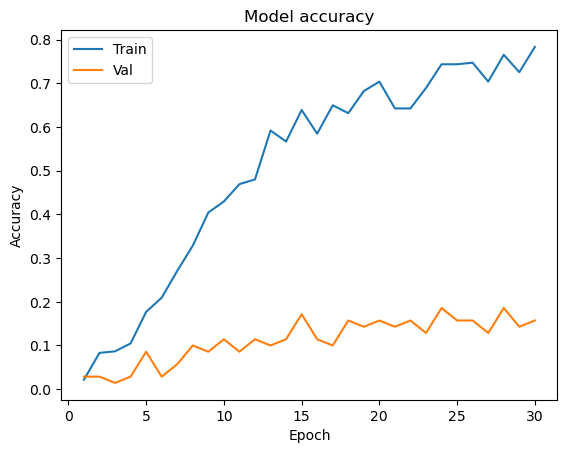

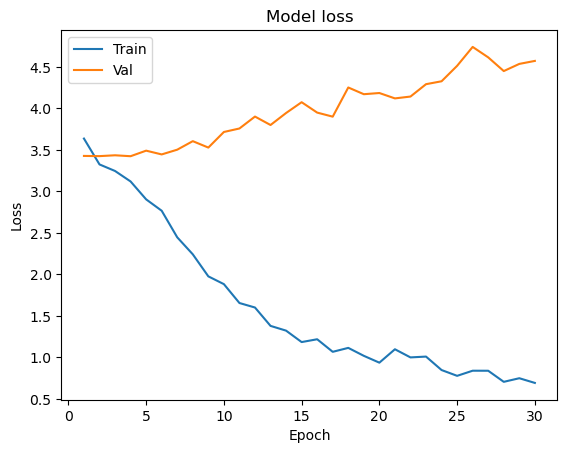

In [37]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
plot_learningCurve(history, 30)

In [38]:
y_test

array([29, 23, 25, 14,  1, 19, 15,  5,  4,  6, 24,  0,  4, 10, 16, 30, 13,
        8, 27, 20, 26, 29, 17, 12, 14, 10, 12, 27,  2, 18, 16,  7, 17, 21,
       22, 11, 18,  1, 21,  3, 25,  5,  4, 11,  5, 29,  2,  0, 23, 20, 25,
        6,  9, 15, 28, 28, 11,  3, 22, 19, 15,  7, 13, 26,  9, 24, 30, 12,
        2,  8])